In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def plot_setup():
    plt.figure(figsize=(10, 6))
    plt.grid()

# Условие

### Группа 3, вариант 22

Сигнал, моделируемый стационарным центированным гауссовским случайным процессом $ X(t) $ с ковариационной функцией $ R(\tau) $  подается на вход некоторой системы. Случайные функции $ X(t) $ и $ K(t) $  — независимы. Функция $ n(t) $ — случайная функция, описывающая шум, возникающий в системе. Выходной сигнал — $ Y(t) $ связан с входным — 
$ X(t) $ уравнением  

$$ L[Y(t)] = \int_{-\infty}^{\infty} h(t-s) \cdot Y(s) ds =
K(t) \cdot X(t) + n(t), $$

где

$$ h(t) = \frac{1}{8} e^{-t/8} \cdot \theta(t \ge 0)$$

и $ \theta(t) $ - функция Хэвисайда.

Входной сигнал $ Х(t) $ имеет ковариационную функцию

$$ R(\tau) = 4e^{-4|\tau|}cos(8\tau). $$

Процесс $ K(t) $ — пуассоновский случайный процесс с математическим ожиданием $ m = 0 $ и дисперсией c
$ D = 22 $. Интенсивность пуассоновского потока равна $ \lambda_0 = 3 $.

Шум в системе $ n(t) $ - полосовой белый шум со спектаральной плотностью 

$$ s(\lambda) = 4 \quad при \quad |\lambda| < 40 $$

и равная нулю в остальных случаях.

# №1

Найдите ковариационную функцию случайного процесса $ K(t) $.

Решение:

$$ cov(K(t), K(s)) = M\{K(t)K(s)\} = \\
= \sum_{k,l=0}^{\infty}M\{K(t)K(s) \; | H_k(s)H_l(t)\} P\{H_k(s)H_l(t)\}  $$

При $ k = l $:

$$ M\{K(t)K(s) \; | H_k(s)H_k(t)\} = 
M\{V_k^2 \; | H_k(s)H_k(t)\} = \\ = M\{V_k^2\} = D $$

При $ k \neq l $:

$$ M\{K(t)K(s) \; | H_k(s)H_k(t)\} = 
M\{V_kV_l \; | H_k(s)H_k(t)\} = \\ = M\{V_kV_l\} = 0 $$


Следовательно,

$$ R_k(t) = cov(K(t), K(s)) = De^{-\lambda_{0}|t|} = 22e^{-3|t|}$$

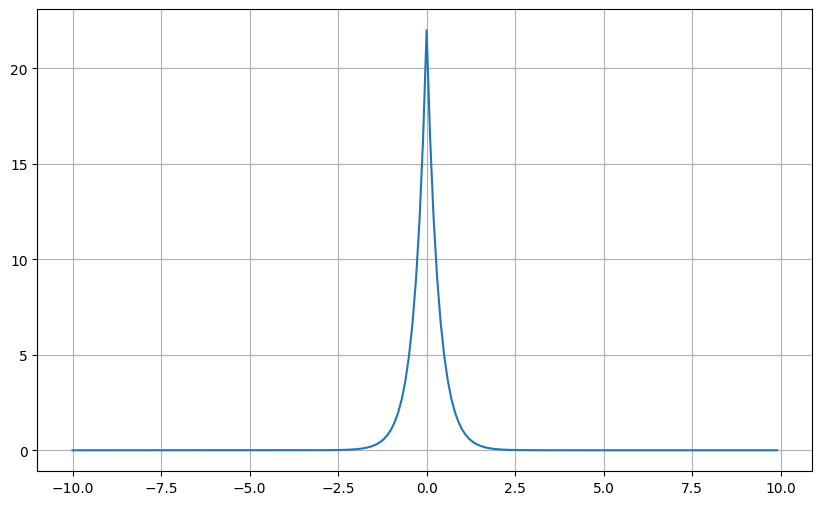

In [3]:
t = np.arange(-10, 10, 0.1)
Rk_func = lambda t: 22 * np.exp(-3 * abs(t))
Rk = Rk_func(t)
plot_setup()
plt.plot(t, Rk)


# №2

Для случайного процесса 

$$ F[X(t), K(t), n(t)] = K(t) \cdot X(t) + n(t). $$

а) Найти ковариационную функцию;     
б) Вычислить спектральную плоскость;

Решение:

а)

$$
cov(F(t), F(t + \tau)) = M\{(F(t) - M\{F(t)\})(F(t+\tau)-M\{F(t+\tau)\})\} = \\
= M\{F(t)F(t+\tau)\}-M\{F(t)\}M\{F(t+\tau)\} = 
$$

Рассмотрим по отдельности:

$$ 
M\{F(t)F(t+\tau)\} = \\ = M\{(K(t) \cdot X(t) + n(t))(K(t + \tau) \cdot X(t + \tau) + n(t + \tau))\} = \\
= M\{(K(t) \cdot X(t))(K(t + \tau) \cdot X(t + \tau))\} + M\{K(t) \cdot X(t) \cdot n(t + \tau)\} + \\ +
M\{n(t) \cdot K(t + \tau) \cdot X(t + \tau)\} + M\{n(t) \cdot n(t + \tau)\} = \\ = 
M\{K(t) \cdot X(t) \cdot K(t + \tau) \cdot X(t + \tau)\} + R_n(t) = \\
= R_x(t) \cdot R_k(t) + R_n(t)
$$

$$
M\{F(t)\}M\{F(t+\tau)\} = 
M\{K(t) \cdot X(t) + n(t)\}M\{K(t + \tau) \cdot X(t + \tau) + n(t + \tau)\} = \\ =
(M\{K(t) \cdot X(t)\} + M\{n(t)\}) \cdot (M\{K(t + \tau) \cdot X(t + \tau)\} + M\{n(t + \tau)\}) = \\ = 
M\{K(t) \cdot X(t)\} \cdot M\{K(t + \tau) \cdot X(t + \tau)\} = 0
$$

Таким образом,


$$
= R_x(t) \cdot R_k(t) + R_n(t)
$$

Из этого неизвестно только $ R_n(t) $, найдем ее:

$$
R_n(t) = \int_{-\infty}^{\infty}e^{it\lambda}s(\lambda)d\lambda =
4 \cdot \int_{-40}^{40}e^{it\lambda}d\lambda =
$$

при $ t \neq 0 $:

$$
= \frac{8}{it}e^{it\lambda} \Big|^{40}_{-40} = ... = \frac{8}{t}
sin(40t)
$$

при $ t = 0 $:

$$
= 4 \cdot \lambda \Big|^{40}_{-40} = ... = 320
$$

Таким образом,

$$ R_n(t) = \begin{cases}
    \frac{8}{t}sin(40t) &\text{,если } t \neq 0 \\
    320 &\text{,если } t = 0
\end{cases} $$

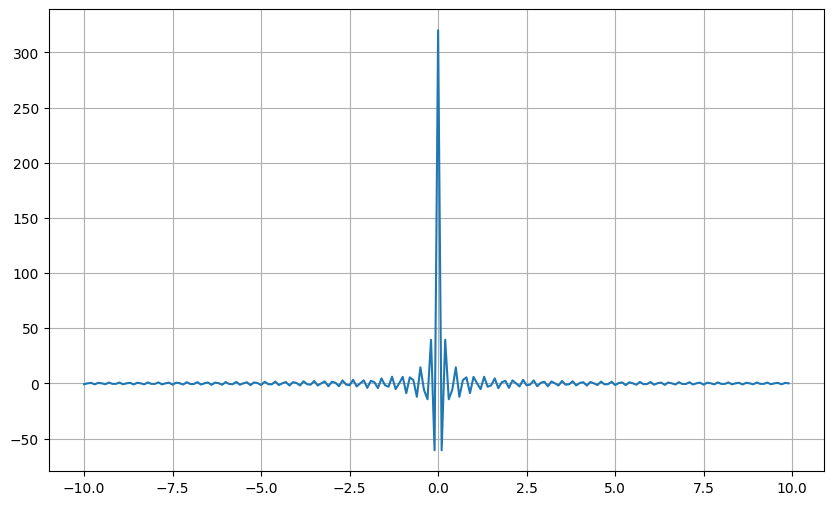

In [4]:
def Rn_func(t):
    if(t == 0):
        return 320
    return 8 / t * np.sin(40 * t)

t = np.arange(-10, 10, 0.1)
Rn = np.zeros(t.size)
for i in range(t.size):
    Rn[i] = Rn_func(t[i])

plot_setup()
plt.plot(t, Rn)

б)

Рассмотрим вспомогательное утверждение:

*Лемма:* Спектральная плотность ковариационной функции

$$ R_\xi(t) = \sigma^2 exp\{-\alpha|t|\}cos{\beta t} $$

имеет вид:

$$ s_\xi(\alpha) = \frac{\sigma^2 \alpha}{2\pi} 
\Big[ \frac{1}{\alpha^2+(\beta+\alpha)^2} + \frac{1}{\alpha^2+(\beta-\alpha)^2} \Big] $$

*Доказательство:*

$$
s_\xi(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{-it\lambda}R_\xi(t)dt = \frac{\sigma^2}{4\pi}\int_{-\infty}^{\infty}e^{-\alpha|t|+it\lambda}(e^{i\beta t}+ e^{-i\beta t})dt = \\ =
\frac{\sigma^2}{4\pi} \Big( \int_{-\infty}^{\infty}e^{-\alpha|t|+i(\lambda+\beta)t}dt + 
\int_{-\infty}^{\infty}e^{-\alpha|t|+i(\lambda-\beta)t}dt \Big) = \\
=
\frac{\sigma^2}{4\pi} \Big( \int_{0}^{\infty}e^{-\alpha t+i(\lambda+\beta)t}dt + \int_{-\infty}^{0}e^{\alpha t+i(\lambda+\beta)t}dt 
+ \\ + 
\int_{0}^{\infty}e^{-\alpha t+i(\lambda-\beta)t}dt 
\int_{-\infty}^{0}e^{\alpha t +i(\lambda-\beta)t}d
\Big) = \\ = ... = \frac{\sigma^2 \alpha}{2\pi} 
\Big[ \frac{1}{\alpha^2+(\beta+\alpha)^2} + \frac{1}{\alpha^2+(\beta-\alpha)^2} \Big]
$$

В нашем случае:

$$ R_F(t) = R_x(t) \cdot R_k(t) + R_n(t) = \\ =
88e^{-7|t|}cos(8t)
$$

Следовательно, 

$$ s_F(\lambda) = \frac{44 \cdot 7}{\pi} 
\Big( 
\frac{1}{49+(8+\lambda)^2} + \frac{1}{49+(8-\lambda)^2}
\Big) + 4 \cdot \theta(|\lambda| \leq 40),$$

где $ \theta(|\lambda| \leq 40) $ - функция Хэвисайда, дающая 1 на отрезке $ [-40, 40]$




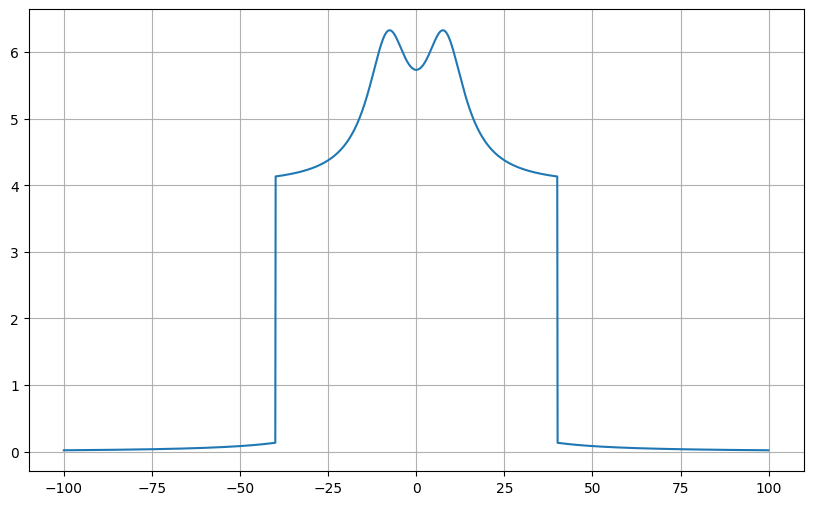

In [5]:
def sF_func(lam):
    s_KX = (44 * 7 / np.pi
    * (1 / (49 + (8 + lam)**2) + 1 / (49 + (8 - lam)**2)))

    if(abs(lam) < 40):
        return s_KX + 4
    return s_KX


lam = np.arange(-100, 100, 0.1)
sF = np.zeros(lam.size)
for i in range(lam.size):
    sF[i] = sF_func(lam[i])
plot_setup()
plt.plot(lam, sF)

# №3

Для выходного сигнала $ Y(t) $ найти:

а) спектральную плотность;    
б) ковариационную функцию;     
в) дисперсию.


Решение:

а) Воспользуемся связью весовой функцией и частотной характеристикой:

$$ 
H(\lambda) = \int_{-\infty}^{+\infty} e^{-it\lambda}h(t)dt = \\ =
\frac{1}{8} \int_{0}^{+\infty} e^{-(\frac{1}{8}+i\lambda)t} dt =
\frac{1}{8i\lambda+1}
$$

$$ 
|H(\lambda)|^2 = \Big| \frac{1}{1 + 64\lambda^2} 
- i \frac{8\lambda}{1 + 64\lambda^2} \Big| ^2 = \frac{1}{1+64\lambda^2}
$$

$$
s_F(\lambda) = |H(\lambda)|^2 \, s_Y(\lambda)
$$

$$
s_Y(\lambda) = \frac{1}{|H(\lambda)|^2} \, s_F(\lambda) = 

(1+64\lambda^2) \cdot \Big[
\frac{44 \cdot 7}{\pi} 
\Big( 
\frac{1}{49+(8+\lambda)^2} + \frac{1}{49+(8-\lambda)^2}
\Big) + 4 \cdot \theta(|\lambda| \leq 40) \Big]

$$


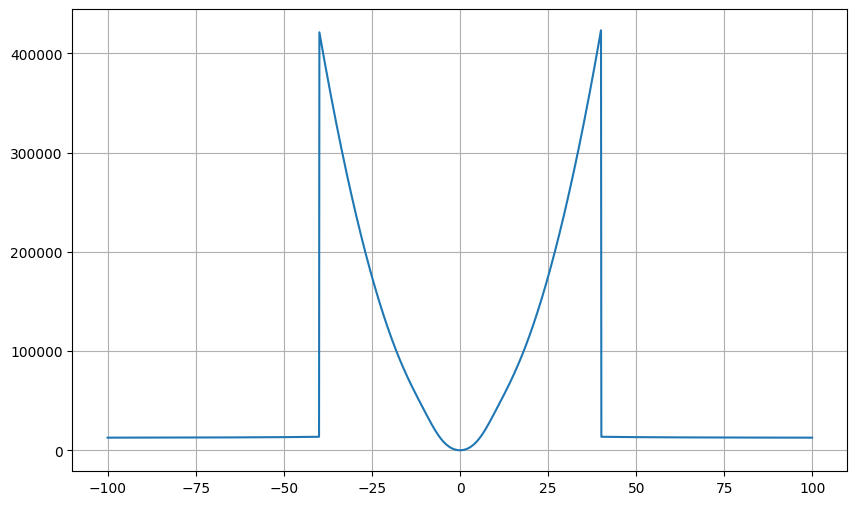

In [6]:
lam = np.arange(-100, 100, 0.1)
sY = sF * (1 + 64 *lam**2)
plot_setup()
plt.plot(lam, sY)

б) Для нахождения ковариационной функции используем известную формулу:

$$ R_Y(t) = \int_{-\infty}^{\infty} e^{i\lambda t} s_Y(\lambda) d\lambda = \\ 

=  = \\ = 
\int_{-\infty}^{\infty} e^{i\lambda t}  
(1+64\lambda^2) \cdot \Big[
\frac{44 \cdot 7}{\pi} 
\Big( 
\frac{1}{49+(8+\lambda)^2} + \frac{1}{49+(8-\lambda)^2}
\Big) + 4 \cdot \theta(|\lambda| \leq 40) \Big]
d\lambda

 = \\ =

\frac{8 sin(40t)}{t} +
64 \dfrac{\left(3200t^2-4\right)\sin\left(40t\right)+160t\cos\left(40t\right)}{t^3} - \\

  -\dfrac{\mathrm{e}^{-7t}\cdot\left(14336{\pi}\sin\left(8t\right)-1922{\pi}\cos\left(8t\right)\right)}{7} +
128 \cdot \delta_0(t)


$$

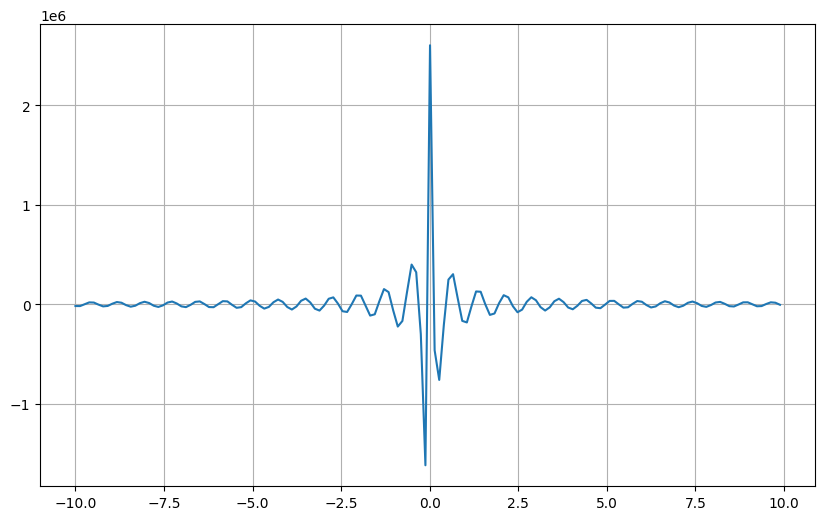

In [7]:
t = np.arange(-10, 10, 0.13)
Rk_func = lambda t: (8 * np.sin(40 * abs(t)) / abs(t) +
                     64 * ((3200 * abs(t)**2 - 4) * np.sin(40 * abs(t)) + 160 * t * np.cos(40 * abs(t))) / abs(t)**3 -
                     np.exp(-7 * abs(t)) * (14336 * np.pi * np.sin(8 * abs(t)) - 1922 * np.pi * np.cos(8 * abs(t))) / 7)

Rk = Rk_func(t)
plot_setup()
plt.plot(t, Rk)

в) Для нахождения дисперсии используем коваирационную функцию:

Дисперсия не определена, поскольку в ковариационной функции присутствует $ \delta_0(t) $:

$$ D_Y = R_Y(0) = \infty
$$